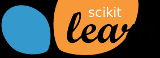

In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<h3>Data reshaping and sampling<h3>

In [12]:
df=pd.read_csv("breast-cancer-wisconsin.csv",sep=';')
  

for i in range(0,len(df)):
    if df.iat[i, 10]==2:
        df.iat[i,10]=0
    else:
        df.iat[i,10]=1
        
for i in range(0,len(df)):
    if df.iat[i, 10] !=1 and df.iat[i, 10] !=0:
        pass
        

ytrain=df["Column11"].to_numpy()
xtrain=df.to_numpy()
df=df.drop(["Column7"],axis=1)

xtrain=df.to_numpy()

sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)

from sklearn.utils import shuffle
xtrain,ytrain = shuffle(xtrain,ytrain, random_state=0)


from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(xtrain,ytrain, test_size=0.2, random_state=42)

<h3> Model building<h3>

In [13]:
mon_modele = MLPClassifier(hidden_layer_sizes=(2,2,1),activation = 'logistic',solver='adam', max_iter=10000, random_state=1)

<h3> Model training<h3>

In [14]:
mon_modele.fit(feature_train,target_train)


MLPClassifier(activation='logistic', hidden_layer_sizes=(2, 2, 1),
              max_iter=10000, random_state=1)

<h3> Model evaluation<h3>

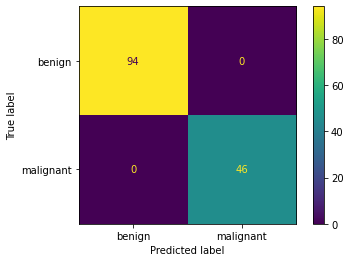

In [15]:
#Prediction on test set
predictions = mon_modele.predict(feature_test)
class_names=["benign","malignant"]
cm = confusion_matrix(target_test,predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
disp.plot() 